In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import os

csv_file_path = os.path.join(os.getcwd(), 'basic_df.csv')
df = pd.read_csv(csv_file_path)
df.shape

(939, 7)

In [143]:
df = df.rename(columns={'Exchange Date': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])

In [144]:
df = df[::-1].copy(deep = True)

In [127]:
print(df.head())

          Date    Close    Net      %Chg     Open      Low     High
938 2020-09-16  1124.10    NaN       NaN  1118.67  1118.21  1126.92
937 2020-09-17  1114.58  -9.52 -0.008469  1124.22  1110.08  1124.34
936 2020-09-18  1113.80  -0.78 -0.000700  1115.83  1111.07  1120.56
935 2020-09-21  1093.33 -20.47 -0.018379  1112.64  1087.69  1117.14
934 2020-09-22  1088.58  -4.75 -0.004345  1094.50  1084.85  1094.66


In [145]:
df = df[(df['Date'] >= '2024-01-01')].copy()
df.set_index('Date', inplace=True)
df.head()


,Close,Net,%Chg,Open,Low,High
Date,,,,,,
2024-01-01,1065.85,1.15,0.001500,1055.57,1055.65,1055.84
2024-01-02,1053.79,-10.09,-0.009484,1063.99,1052.33,1065.07
2024-01-03,1040.77,-13.02,-0.012355,1053.27,1040.29,1053.33
2024-01-04,1044.52,3.75,0.003603,1040.96,1038.94,1046.81
2024-01-05,1043.98,-0.54,-0.000517,1045.21,1038.93,1045.52


In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Ohlc(x=df.index,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'))
fig.show()

In [146]:
to_predict_csv_file_path = os.path.join(os.getcwd(), 'to_predict.csv')
to_predict_df = pd.read_csv(to_predict_csv_file_path)
to_predict_df = to_predict_df.rename(columns={'Exchange Date': 'Date'})
to_predict_df.set_index('Date', inplace=True)
to_predict_df.head()

,Close
Date,
2024-04-29 00:00:00,NaN
2024-04-26 00:00:00,NaN
2024-04-25 00:00:00,NaN
2024-04-24 00:00:00,NaN
2024-04-23 00:00:00,NaN


In [147]:
df = pd.concat([df, to_predict_df[::-1]])
df[::-1].head(10)

,Close,Net,%Chg,Open,Low,High
Date,,,,,,
2024-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-22 00:00:00,1067.81,5.08,0.004780,1063.63,1061.95,1069.61
2024-04-19 00:00:00,1062.73,-15.16,-0.014065,1077.39,1054.16,1077.51
2024-04-18 00:00:00,1077.89,3.02,0.002810,1076.24,1072.81,1083.88
2024-04-17 00:00:00,1074.87,3.81,0.003557,1070.80,1070.46,1076.86


In [148]:
df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_5, name='SMA 5'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_15, name='SMA 15'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=df.index, y=df.Close, name='Close', opacity=0.2))
fig.show()

In [133]:
df.head()

,Close,Net,%Chg,Open,Low,High,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30
Date,,,,,,,,,,,
2024-01-01 00:00:00,1065.85,1.15,0.001500,1055.57,1055.65,1055.84,NaN,NaN,NaN,NaN,NaN
2024-01-02 00:00:00,1053.79,-10.09,-0.009484,1063.99,1052.33,1065.07,1065.850000,NaN,NaN,NaN,NaN
2024-01-03 00:00:00,1040.77,-13.02,-0.012355,1053.27,1040.29,1053.33,1059.502632,NaN,NaN,NaN,NaN
2024-01-04 00:00:00,1044.52,3.75,0.003603,1040.96,1038.94,1046.81,1052.590221,NaN,NaN,NaN,NaN
2024-01-05 00:00:00,1043.98,-0.54,-0.000517,1045.21,1038.93,1045.52,1050.243545,NaN,NaN,NaN,NaN


In [149]:
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.index, y=df.RSI, name='RSI'))
fig.show()

In [150]:
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df.index, y=df.Close, name='Close'))
fig.add_trace(go.Scatter(x=df.index, y=EMA_12, name='EMA 12'))
fig.add_trace(go.Scatter(x=df.index, y=EMA_26, name='EMA 26'))
fig.show()

In [151]:
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MACD'], name='MACD'))
fig.add_trace(go.Scatter(x=df.index, y=df['MACD_signal'], name='Signal line'))
fig.show()

In [137]:
df.head()

,Close,Net,%Chg,Open,Low,High,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,RSI,MACD,MACD_signal
Date,,,,,,,,,,,,,,
2024-01-01 00:00:00,1065.85,1.15,0.001500,1055.57,1055.65,1055.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 00:00:00,1053.79,-10.09,-0.009484,1063.99,1052.33,1065.07,1065.850000,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2024-01-03 00:00:00,1040.77,-13.02,-0.012355,1053.27,1040.29,1053.33,1059.502632,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2024-01-04 00:00:00,1044.52,3.75,0.003603,1040.96,1038.94,1046.81,1052.590221,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2024-01-05 00:00:00,1043.98,-0.54,-0.000517,1045.21,1038.93,1045.52,1050.243545,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [152]:
df[::-1].head(10)

,Close,Net,%Chg,Open,Low,High,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,RSI,MACD,MACD_signal
Date,,,,,,,,,,,,,,
2024-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,-1.643612
2024-04-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,-1.175407
2024-04-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,-0.590151
2024-04-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,0.141421
2024-04-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,1070.872,1091.955,1095.051333,1095.275333,0.000000,-3.516424,1.055887
2024-04-22 00:00:00,1067.81,5.08,0.004780,1063.63,1061.95,1069.61,1091.500615,1078.032,1095.442,1096.970667,1096.042000,37.806587,-3.516424,2.198973
2024-04-19 00:00:00,1062.73,-15.16,-0.014065,1077.39,1054.16,1077.51,1094.698415,1088.826,1099.544,1099.049333,1096.866333,34.608743,-1.970002,3.627835
2024-04-18 00:00:00,1077.89,3.02,0.002810,1076.24,1072.81,1083.88,1096.566708,1097.206,1101.660,1099.838000,1096.906667,41.789668,0.548585,5.027311
2024-04-17 00:00:00,1074.87,3.81,0.003557,1070.80,1070.46,1076.86,1098.978445,1105.748,1104.682,1100.948000,1097.275000,42.479490,2.215554,6.147008


In [159]:
df['Close'][:-5] = df['Close'][:-5].shift(-5)

C:\Users\anaro\AppData\Local\Temp\ipykernel_17148\2726157974.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [160]:
df[::-1].head(15)

,Close,Net,%Chg,Open,Low,High,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,RSI,MACD,MACD_signal
Date,,,,,,,,,,,,,,
2024-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,-1.643612
2024-04-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,-1.175407
2024-04-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,-0.590151
2024-04-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,NaN,NaN,NaN,NaN,0.000000,-3.516424,0.141421
2024-04-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1089.130915,1070.872,1091.955,1095.051333,1095.275333,0.000000,-3.516424,1.055887
2024-04-22 00:00:00,NaN,5.08,0.004780,1063.63,1061.95,1069.61,1091.500615,1078.032,1095.442,1096.970667,1096.042000,37.806587,-3.516424,2.198973
2024-04-19 00:00:00,NaN,-15.16,-0.014065,1077.39,1054.16,1077.51,1094.698415,1088.826,1099.544,1099.049333,1096.866333,34.608743,-1.970002,3.627835
2024-04-18 00:00:00,NaN,3.02,0.002810,1076.24,1072.81,1083.88,1096.566708,1097.206,1101.660,1099.838000,1096.906667,41.789668,0.548585,5.027311
2024-04-17 00:00:00,NaN,3.81,0.003557,1070.80,1070.46,1076.86,1098.978445,1105.748,1104.682,1100.948000,1097.275000,42.479490,2.215554,6.147008


In [161]:
df = df.iloc[33:] # Because of moving averages and MACD line
df = df[:-5]

In [163]:
df[::-1].head()

,Close,Net,%Chg,Open,Low,High,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,RSI,MACD,MACD_signal
Date,,,,,,,,,,,,,,
2024-04-22 00:00:00,NaN,5.08,0.004780,1063.63,1061.95,1069.61,1091.500615,1078.032,1095.442,1096.970667,1096.042000,37.806587,-3.516424,2.198973
2024-04-19 00:00:00,NaN,-15.16,-0.014065,1077.39,1054.16,1077.51,1094.698415,1088.826,1099.544,1099.049333,1096.866333,34.608743,-1.970002,3.627835
2024-04-18 00:00:00,NaN,3.02,0.002810,1076.24,1072.81,1083.88,1096.566708,1097.206,1101.660,1099.838000,1096.906667,41.789668,0.548585,5.027311
2024-04-17 00:00:00,NaN,3.81,0.003557,1070.80,1070.46,1076.86,1098.978445,1105.748,1104.682,1100.948000,1097.275000,42.479490,2.215554,6.147008
2024-04-16 00:00:00,NaN,-20.72,-0.018978,1091.60,1070.13,1091.64,1102.081912,1113.038,1107.141,1102.230000,1097.560333,39.423077,4.617726,7.129889


In [164]:
split = int(len(df[:-5]) * 0.75)

train  = df[:split].copy()
valid  = df[split:-5].copy()
test   = df[-5:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid.index, y=valid.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test.index,  y=test.Close,  name='Test'))
fig.show()

In [165]:
test.head()

,Close,Net,%Chg,Open,Low,High,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,RSI,MACD,MACD_signal
Date,,,,,,,,,,,,,,
2024-04-16 00:00:00,NaN,-20.72,-0.018978,1091.60,1070.13,1091.64,1102.081912,1113.038,1107.141,1102.230000,1097.560333,39.423077,4.617726,7.129889
2024-04-17 00:00:00,NaN,3.81,0.003557,1070.80,1070.46,1076.86,1098.978445,1105.748,1104.682,1100.948000,1097.275000,42.479490,2.215554,6.147008
2024-04-18 00:00:00,NaN,3.02,0.002810,1076.24,1072.81,1083.88,1096.566708,1097.206,1101.660,1099.838000,1096.906667,41.789668,0.548585,5.027311
2024-04-19 00:00:00,NaN,-15.16,-0.014065,1077.39,1054.16,1077.51,1094.698415,1088.826,1099.544,1099.049333,1096.866333,34.608743,-1.970002,3.627835
2024-04-22 00:00:00,NaN,5.08,0.004780,1063.63,1061.95,1069.61,1091.500615,1078.032,1095.442,1096.970667,1096.042000,37.806587,-3.516424,2.198973


In [166]:
FEATURES = ['EMA_9', 'SMA_5',
       'SMA_10', 'SMA_15', 'SMA_30', 
       'RSI', 'MACD', 'MACD_signal'
       ]
TARGET = 'Close'

In [167]:
x_train = train[FEATURES]
x_valid = valid[FEATURES]
x_test = test[FEATURES]

y_train = train[TARGET]
y_valid = valid[TARGET]

Fine-tune XGBoostRegressor

In [168]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [6, 8, 10, 12],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(x_train, y_train), (x_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=True)
clf = GridSearchCV(model, parameters)

clf.fit(x_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

c:\Users\anaro\miniconda3\envs\lseg\Lib\site-packages\xgboost\core.py:160: UserWarning:

[02:59:19] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.


c:\Users\anaro\miniconda3\envs\lseg\Lib\site-packages\xgboost\core.py:160: UserWarning:

[02:59:19] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.


c:\Users\anaro\miniconda3\envs\lseg\Lib\site-packages\xgboost\core.py:160: UserWarning:

[02:59:19] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.


c:\Users\anaro\miniconda3\envs\lseg\Lib\site-packages\xgboost\core.py:160: UserWarning:

[02:59:19] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used

Best params: {'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'random_state': 42}
Best validation score = -4.662288095784279


c:\Users\anaro\miniconda3\envs\lseg\Lib\site-packages\xgboost\core.py:160: UserWarning:

[03:03:36] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.




In [169]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose=True)

[0]	validation_0-rmse:8.98793	validation_1-rmse:21.71039
[1]	validation_0-rmse:8.63297	validation_1-rmse:21.56012
[2]	validation_0-rmse:8.29464	validation_1-rmse:21.43614
[3]	validation_0-rmse:7.97206	validation_1-rmse:21.31002
[4]	validation_0-rmse:7.66490	validation_1-rmse:21.19512
[5]	validation_0-rmse:7.37224	validation_1-rmse:21.09574
[6]	validation_0-rmse:7.09333	validation_1-rmse:21.00046
[7]	validation_0-rmse:6.82770	validation_1-rmse:20.91403
[8]	validation_0-rmse:6.57490	validation_1-rmse:20.84428
[9]	validation_0-rmse:6.33413	validation_1-rmse:20.77294
[10]	validation_0-rmse:6.10513	validation_1-rmse:20.70861
[11]	validation_0-rmse:5.88740	validation_1-rmse:20.65069
[12]	validation_0-rmse:5.67843	validation_1-rmse:20.60165
[13]	validation_0-rmse:5.47829	validation_1-rmse:20.61823
[14]	validation_0-rmse:5.28410	validation_1-rmse:20.64820
[15]	validation_0-rmse:5.09853	validation_1-rmse:20.62628
[16]	validation_0-rmse:4.91970	validation_1-rmse:20.65821
[17]	validation_0-rmse:4

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
x_all = df[FEATURES]
y_all = df[TARGET]

In [ ]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(x_all, y_all, eval_set=[(x_all, y_all)], verbose=True)

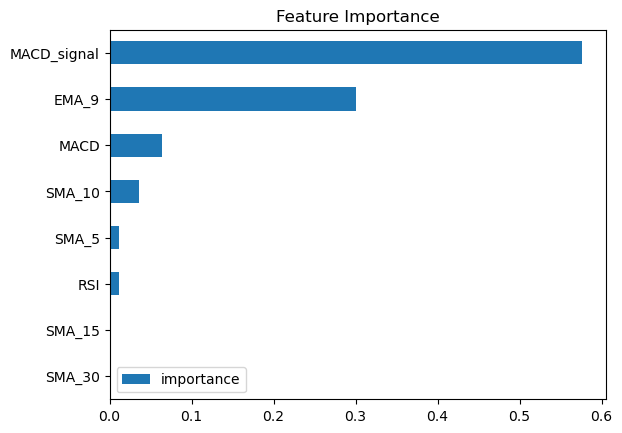

In [170]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [171]:
x_test.head()

,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,RSI,MACD,MACD_signal
Date,,,,,,,,
2024-04-16 00:00:00,1102.081912,1113.038,1107.141,1102.230000,1097.560333,39.423077,4.617726,7.129889
2024-04-17 00:00:00,1098.978445,1105.748,1104.682,1100.948000,1097.275000,42.479490,2.215554,6.147008
2024-04-18 00:00:00,1096.566708,1097.206,1101.660,1099.838000,1096.906667,41.789668,0.548585,5.027311
2024-04-19 00:00:00,1094.698415,1088.826,1099.544,1099.049333,1096.866333,34.608743,-1.970002,3.627835
2024-04-22 00:00:00,1091.500615,1078.032,1095.442,1096.970667,1096.042000,37.806587,-3.516424,2.198973


In [185]:
csv_file_path = os.path.join(os.getcwd(), 'test.csv')
truth_df = pd.read_csv(csv_file_path)
truth_df = truth_df[::-1]
truth_df.head()

,Exchange Date,Close
4,2024-04-23 00:00:00,1077.11
3,2024-04-24 00:00:00,1091.21
2,2024-04-25 00:00:00,1088.62
1,2024-04-26 00:00:00,1102.34
0,2024-04-29 00:00:00,1112.34


In [186]:
y_true = np.array(truth_df['Close'])
y_pred = model.predict(x_test)
print(f'y_true = {y_true}')
print(f'y_pred = {y_pred}')
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(rmse)

y_true = [1077.11 1091.21 1088.62 1102.34 1112.34]
y_pred = [1094.6296 1094.6296 1095.0701 1097.0746 1101.8418]
9.981702400564735


In [187]:
predictions = pd.DataFrame(truth_df)
predictions['Close'] = y_pred

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=truth_df['Exchange Date'], 
                         y=truth_df['Close'],
                         name='Truth'))

fig.add_trace(go.Scatter(x=predictions['Exchange Date'],
                         y=predictions['Close'],
                         name='Prediction'))
fig.show()